In [154]:
import sys 
import stacklineplot
import torch
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 8]
sys.path.append("../")
from utils import reduce_channel_batch, interpolate_signals
import scipy
from scipy.fftpack import fft, ifft

In [158]:
def remove_high_freq(signals):
    y = fft(signals)
    threashold = 100
    y[:, threashold:] = 0
    x_hat = ifft(y)
    return x_hat

In [213]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### VQVAE 2 Fill

In [179]:
samples = np.load("../denoise/results_fill/sample-eval-900.npy")
sample_idx = 1
sample = samples[sample_idx]

original = sample[:3]
target = sample[1:2]
reconstructed = sample[3:]

# y1 = sample[0, :]
# y2 = sample[2, :]
# estimated = (y1 + y2) / 2
estimated = np.expand_dims(interpolate_signals(sample[0], sample[2]), 0)
# criterion = torch.nn.MSELoss()
criterion = torch.nn.L1Loss()

#### Original

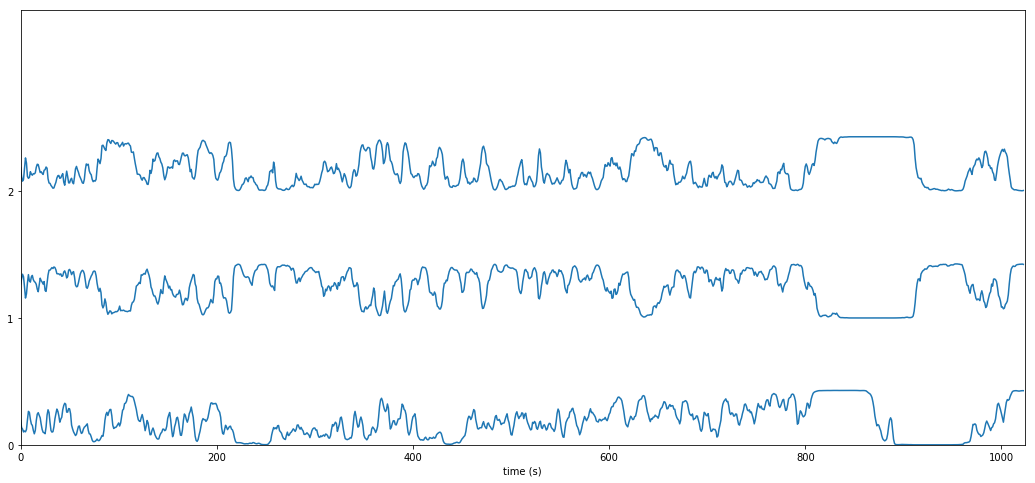

In [180]:
plt.rcParams['figure.figsize'] = [18, 8]
stacklineplot.stackplot(original, yscale=.3)

lower frequency graph

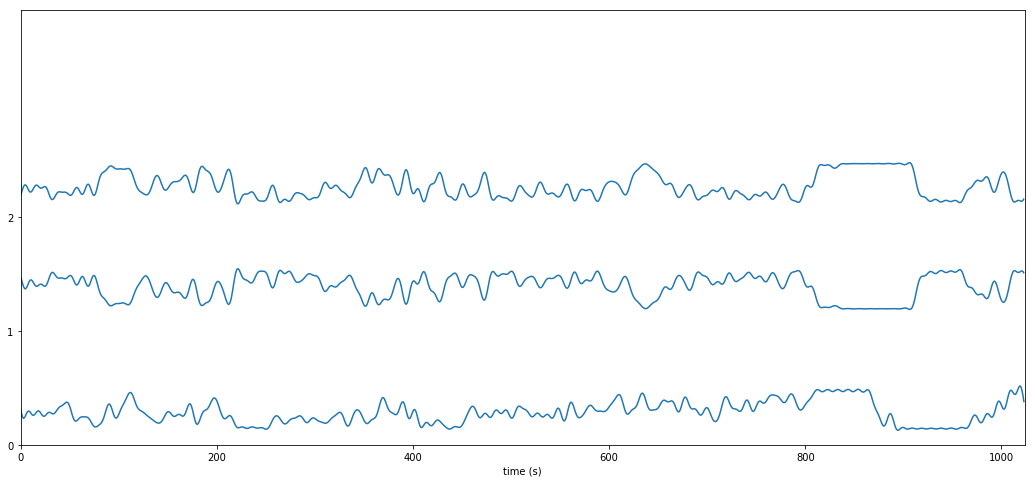

In [181]:
stacklineplot.stackplot(remove_high_freq(original), yscale=.3)

#### Target vs Reconstructed

estimated diff tensor(0.4767)
reconstructed diff tensor(0.2582)
percent deacrease 45


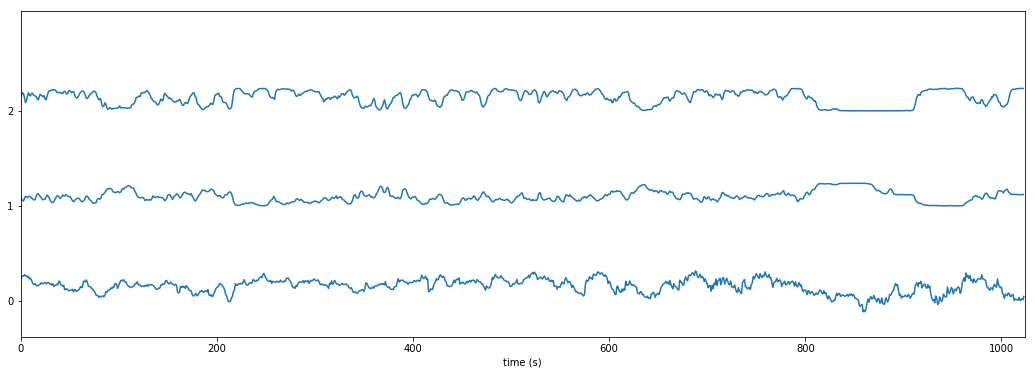

In [187]:
plt.rcParams['figure.figsize'] = [18, 6]
stacklineplot.stackplot(np.vstack((reconstructed, estimated, target)), yscale=.3)
estimated_diff = criterion(torch.from_numpy(estimated), torch.from_numpy(target))
reconstructed_diff = criterion(torch.from_numpy(reconstructed), torch.from_numpy(target))
print("estimated diff", estimated_diff)
print("reconstructed diff", reconstructed_diff)
print("percent deacrease", int(100 * (estimated_diff - reconstructed_diff)/estimated_diff))
# first one is the target
# second is the estimated via interpolation
# third is estiamted via vq-vae 2

In [218]:
from matplotlib.lines import Line2D
def single_plot_compare(target, reconstructed, estimated):
    plt.plot(np.squeeze(target.real), linewidth=2)
    plt.plot(np.squeeze(reconstructed.real), linewidth=2)
    plt.plot(np.squeeze(estimated.real), linewidth=2)
    colors = ['blue', 'orange', 'green']
    lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
    labels = ['Target', 'Reconstructed', 'Avg Iterpolation']
    plt.legend(lines, labels)
    plt.show()

Compare lower frequency aspects

estimated diff tensor(0.2709)
reconstructed diff tensor(0.1379)
percent deacrease 49


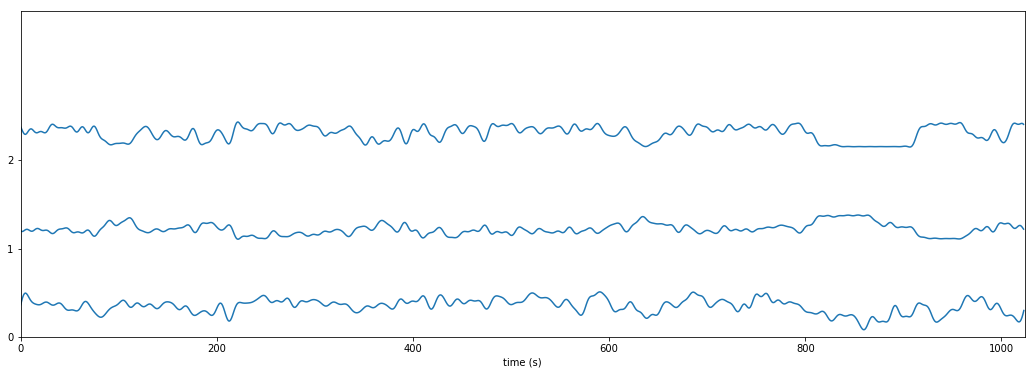

In [183]:
plt.rcParams['figure.figsize'] = [18, 6]
low_freq_reconstructed = remove_high_freq(reconstructed)
low_freq_estimated  = remove_high_freq(estimated)
low_freq_target = remove_high_freq(target)
stacklineplot.stackplot(np.vstack((low_freq_reconstructed, low_freq_estimated, low_freq_target)), yscale=.3)
estimated_diff = criterion(torch.from_numpy(low_freq_estimated.real), torch.from_numpy(low_freq_target.real))
reconstructed_diff = criterion(torch.from_numpy(low_freq_reconstructed.real), torch.from_numpy(low_freq_target.real))
print("estimated diff", estimated_diff)
print("reconstructed diff", reconstructed_diff)
print("percent deacrease", int(100 * (estimated_diff - reconstructed_diff)/estimated_diff))
# first one is the target
# second is the estimated via interpolation
# third is estiamted via vq-vae 2

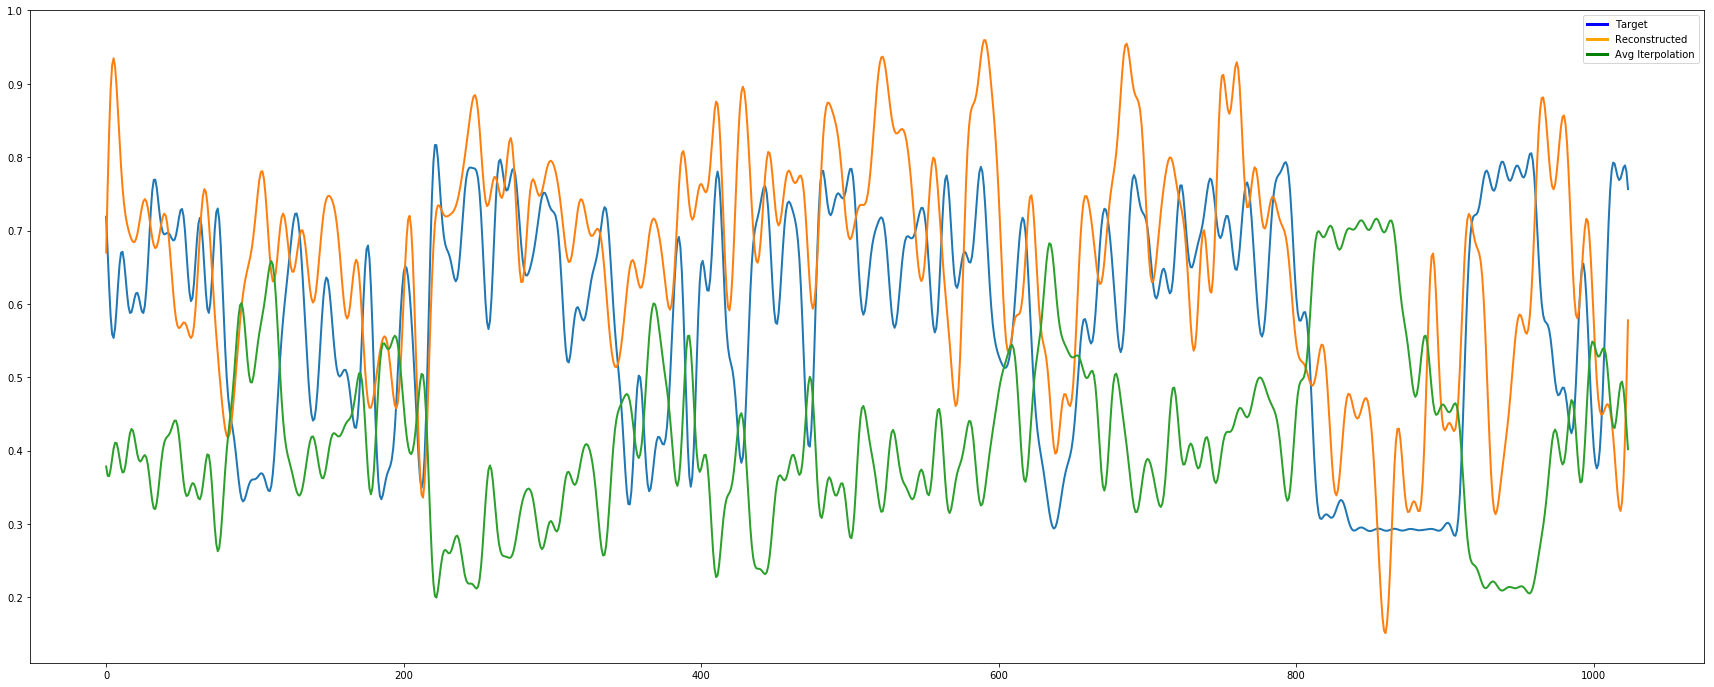

In [219]:
plt.rcParams['figure.figsize'] = [30, 12]
single_plot_compare(low_freq_target, low_freq_reconstructed, low_freq_estimated)

### Conv VAE Neural Fill

Conv VAE with 3 channel input and 1 channel output

In [105]:
samples = np.load("../denoise/results_denoise/1c_conv_fill_eval_999.npy")
sample_idx = 2
sample = samples[sample_idx]

original = sample[:3, :]
reconstructed = np.expand_dims(sample[3], 0)
estimated = np.expand_dims(interpolate_signals(sample[0], sample[2]), 0)
target_channel = np.expand_dims(original[1], 0)
all_versions = np.squeeze(np.stack([estimated, reconstructed, target_channel]))

#### All on Same Plot

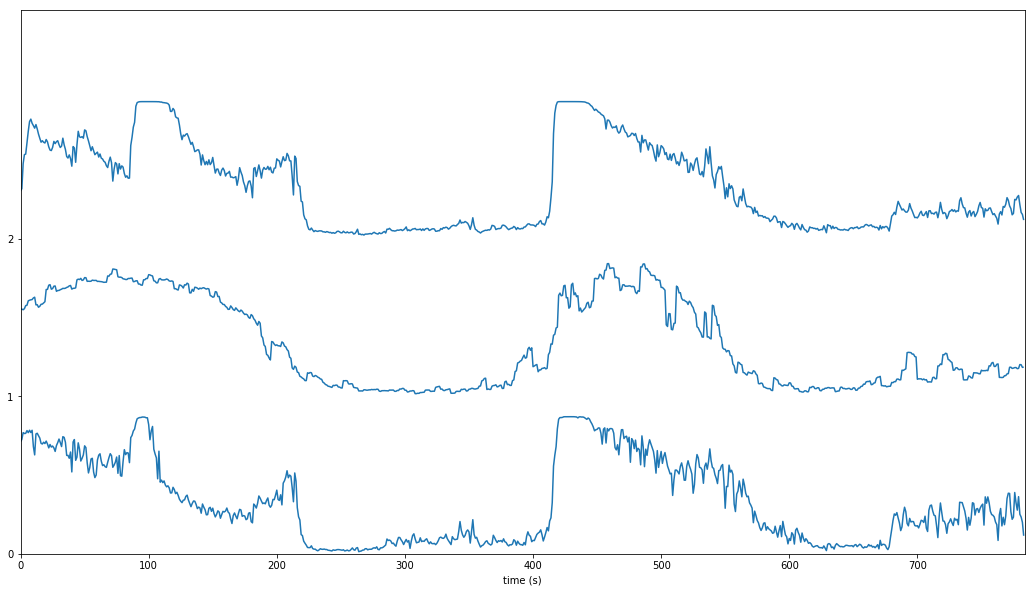

In [106]:
plt.rcParams['figure.figsize'] = [18, 10]
stacklineplot.stackplot(all_versions, yscale=.6)
# 1st is original, 2nd is VAE, 3rd is Inerpolation

#### Original

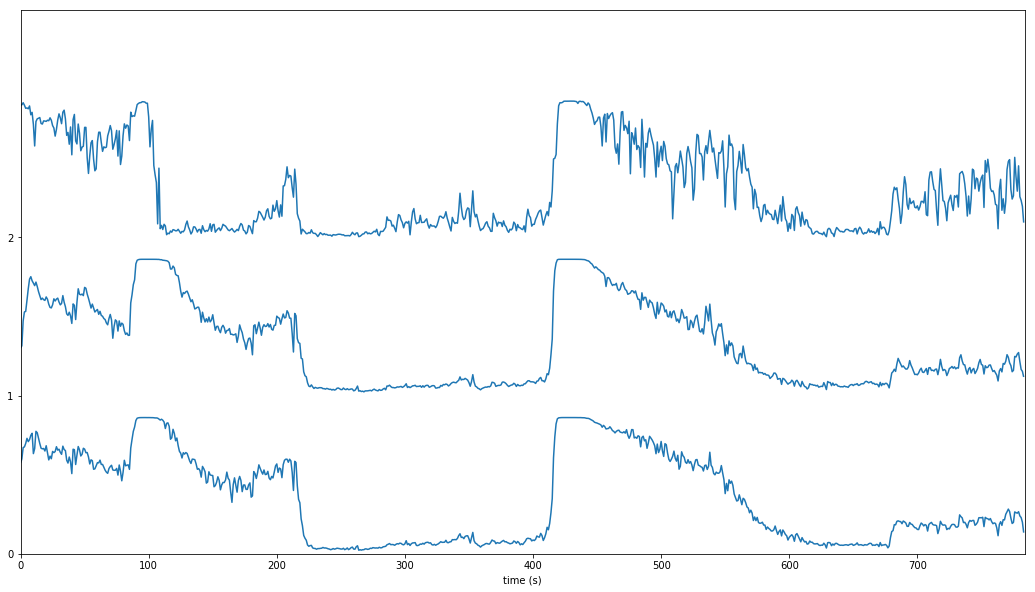

In [107]:
plt.rcParams['figure.figsize'] = [18, 10]
stacklineplot.stackplot(original, yscale=.6)
# middle channel is target channel

#### Fill by VAE

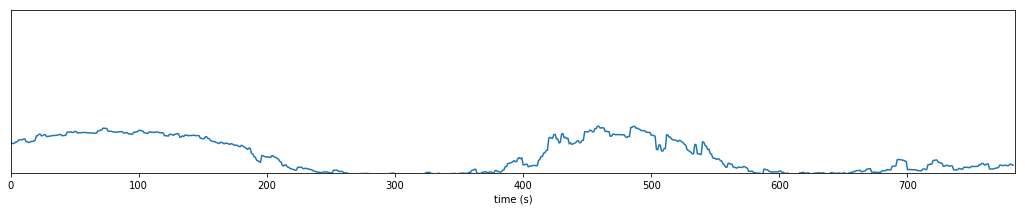

In [108]:
plt.rcParams['figure.figsize'] = [18, 3]
stacklineplot.stackplot(reconstructed, yscale=.3)

#### Fill by Interpolation

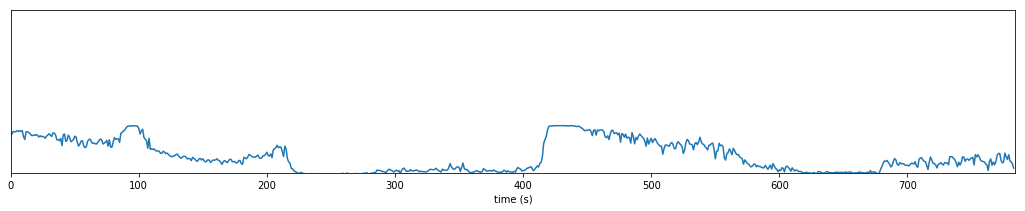

In [109]:
plt.rcParams['figure.figsize'] = [18, 3]
stacklineplot.stackplot(estimated, yscale=.3)